# L17 GreyAtmosphere

We start by importing the modules

* Numpy -- operations on arrays and matrixes (and pi)
* Matplotlib pyplot -- plotting library
* Matplotlin patches -- module that enables patches in plots
* Astropy units -- defined quantities with units. We also import the CDS conversions
* **Scipy special** -- enable the use of the exponential integral function
* **Astropy convolution** -- we will use this to smooth the spectrum of the sun

In [1]:
import numpy as np, copy
import matplotlib.pyplot as plt
%matplotlib inline
from astropy import constants as const
import astropy.units as u
from astropy.units import cds
cds.enable() 

from scipy.special import expn
from astropy.convolution import convolve, Box1DKernel

## 1. In class: Temperature structure of the Sun

Here, I provide a file containing (among other things) the temperature structure of the atmosphere of the sun resulting from a detailed model of the Sun's atmosphere (numerical solution involving all 9 equations).

We will compare this to the analytical estimate we obtained by making the approximation that the opacity ($\kappa$) is "grey" (not dependent on wavelength). We also had to use one equation resulting from making a further approximation that the optical depth ($\tau$) is large. 

So let's see how good/bad this approximation actually is!

> **TODO**: In the text below, please write down the equation you are using for $T(\tau)$ in latex format.

> **TODO**: In the graph below, add a curve that shows the approximation for $T(\tau)$ assuming that the correction factor $q(\tau)=0.7104 - 0.133\mathrm{e}^{-3.4488\tau_z}$. 

> **TODO**: In the graph below, add a curve that shows the approximation for $T(\tau)$ assuming that the correction factor $q(\tau)\sim \frac{2}{3}.$

> **TODO**: don't forget to add axis labels and a legend to your graph.

In [2]:
file_url = "https://raw.githubusercontent.com/veropetit/PHYS633-F2024/main/Book/L17-GreyAtmosphere/17-sun_model.txt"
data = np.genfromtxt(file_url, skip_header=24, skip_footer=229, usecols=(1,2,4), names=True)

fig, ax = plt.subplots(1,1, figsize=(6,5))
ax.set_xlim(0,2)
ax.set_ylim(4500,7000)

ax.plot(10**data['lgTauR'], data['T'], label='Sun', lw=7, c="0.75")


# Define the effective temperature used for the solar model
Teff = 5777.0
#---------------------------------------
# In class




#------------------------

FileNotFoundError: https://raw.githubusercontent.com/veropetit/PHYS633-F2024/main/Book/L17-GreyAtmosphere/17-sun_model.txt not found.

> **TODO**: <font color='red'>Please write a small paragraph with an interpretation of the result obtained:</font>

## 2. Provided function: Calculation of the $C(\alpha, \tau)$ function

In the worksheet in classe you derived this expression for the specific flux in a layer of depth $\tau$ in a grey atmophere:

$$F_\alpha(\tau) = \frac{4\pi k^4T_\mathrm{eff}^4}{c^2 h^3} \alpha^3 \left[ \int_{\tau'=\tau}^\infty \frac{E_2(t-\tau)d\tau'}{e^{\alpha p(\tau')}-1} - \int_{\tau'=0}^\tau \frac{E_2(\tau-\tau')d\tau'}{e^{\alpha p(\tau')}-1} \right],$$

where the term in brackets is $C(\alpha, \tau)$, and $\alpha=hc/\lambda kT_\mathrm{eff}$ and $p(\tau)=T_\mathrm{eff}/T(\tau)$. 

The function below accepts a single value of $\alpha$ and a single value of $\tau$. It returns the value of $C(\alpha, \tau)$ **(The quantity in brackets)**.

In [ ]:
def p_function(tau):
    
    q = 0.7104 - 0.133*np.exp(-1*3.4488*tau)
    p = 1.0 / ( 0.75 * (tau + q))**0.25
    return(p)

def c_function(alpha, tau):
    
    # create values of t for the integration
    tau_prime_low = np.linspace(0,tau, 1000)
    tau_prime_high = np.linspace(tau, 20, 1000)
    
    # Do the first integral
    y = expn(2, tau_prime_high - tau) / ( np.exp( p_function(tau_prime_high) * alpha)-1 )

    int_high = np.trapz( y, tau_prime_high)
    
    y = expn(2, tau - tau_prime_low) / (np.exp( p_function(tau_prime_low) * alpha)-1 )
    int_low = np.trapz( y, tau_prime_low)
    
    C = int_high - int_low
    
    return(C)


## 3. Let's make a graph of the specific flux for various layers in the atmosphere. 

In the class worksheet, we found that $F_\alpha / \tilde{F}$ can be expressed as

$$ \frac{F_\alpha(\tau)}{\tilde{F}} = \frac{30}{\pi^4} \alpha^3 C(\alpha, \tau).$$

> **TODO**: 
>
> Use the function provided above for $C(\alpha, \tau)$ above to calculate and plot the flux $F_\lambda$ (in $\mathrm{erg}/\mathrm{s}/\mathrm{cm}^2/\mathrm{nm}$) predicted by the Grey atmosphere model for atmosphere layers with $\tau$ values between 0 and 2. 

I suggest the following procedure:

1. find the $\alpha$ corresponding to the wavelength given (use the astropy package!)
2. find $F_\alpha/F$ (you'll need a loop over alpha values, as the `c_function(alpha, tau)` does not accept arrays).
3. convert $F_\alpha/F$ to $F_\lambda/F$ (see worksheet)
4. find the value of $F$ (see worksheet)
5. multiply by $F$ and covert to the correct units ($\mathrm{erg}/\mathrm{s}/\mathrm{cm}^2/\mathrm{nm}$).

Note 1: The graph has already the correct axis limits -- if your curves are not visible or go off the graph, check your work again!

Note 2: I highly suggests that you make use of the astropy unit and constant packages. Note that when passing an $\alpha$ to the `c_function(alpha, tau)`, make sure to `alpha.decompose()` and then pass `alpha.value` to the function.  

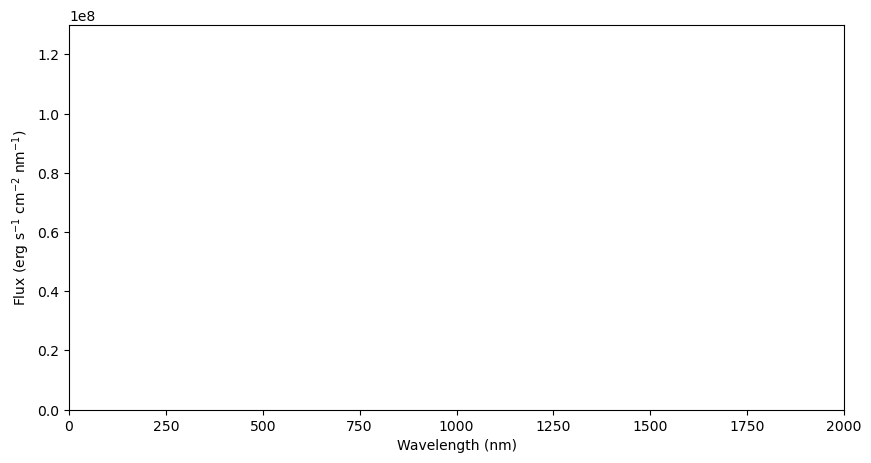

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.set_xlim(0,2000)
ax.set_ylim(0, 1.3e8)

ax.set_ylabel(r'Flux (erg s$^{-1}$ cm$^{-2}$ nm$^{-1}$)')
ax.set_xlabel('Wavelength (nm)')

#----------------------
Teff = 5777*u.K # This is the effective temperature of the model

# I am giving your an array of wavelenght in nm to get you started.
wave = np.linspace(1,2000, 1000)*u.nm 
#----------------------


> **TODO**: <font color='red'>Please write a small paragraph with an interpretation of the result obtained:</font>
>
> Q: Describe the differences in the curves, and why they make sense. 
>
> Q: From looking at your graph, does our condition $\tilde{F}=\sigma T_\mathrm{eff}^4$ for every layer seem respected?
>
> Q: Which of the curves on the graph represent the flux spectrum that we will see from Earth?

## 4. Let's compare the grey flux with the real solar flux

In the plot below, I give you the solar spectrum, calculated with detailed stellar atmosphere models, that will emerge from the surface of the Sun. The wavelength axis is in $\mathrm{nm}$, and the units of flux are $\mathrm{erg}/\mathrm{s}/\mathrm{cm}^2/\mathrm{nm}$. 

> **TODO**: a. To the graph, add the curve from #3 that corresponds to the surface flux spectrum. 


> **TODO** b. When we made an approximation of a linear source function (e.g. when talked about Limb-darkening), we found that $F_\lambda(\tau_\lambda=0) \sim \pi S_\lambda(\tau_\lambda=2/3)$. So in other words, if the source function is the Planck function, then the $F_\lambda(\tau_\lambda=0)$ will be equal to the Plack function for a temperature that corresponds to the atmosphere layer that has an optical depth of 2/3, multiplied by $\pi$. 
>
> i) Using our expression for the grey temperature structure (with $q(\tau\sim2/3)$) of the atmosphere, find $T(\tau=2/3)$ 
>
> ii) Add a curve for the predicted observed $F_\lambda$ in this approximation. There are many ways to do this:
>
>  - Computing the expression for $B_\alpha$ from the worksheet and converting to $B_\lambda$ with the code.
>  - Computing the expression for $B_\nu$ from the worksheet and coverting to $B_\lambda$ with the code.
>  - Analytically finding the expression for $B_\lambda$ from the expression for $B_\nu$ given in the worksheet. 
>
> Pick one and show your work and/or reasoning below (and don't forget to multiply $B$ by $\pi$)

Enter your work and/or reasoning here:

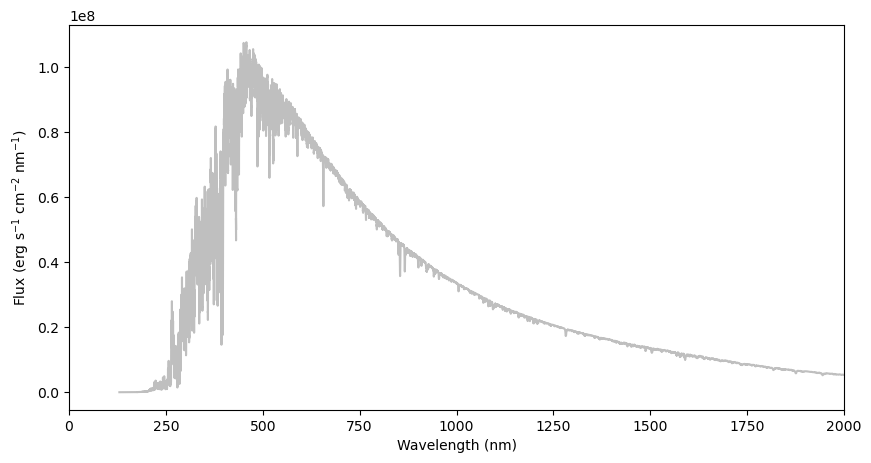

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.set_xlim(0,2000)

ax.set_ylabel(r'Flux (erg s$^{-1}$ cm$^{-2}$ nm$^{-1}$)')
ax.set_xlabel('Wavelength (nm)')

# Loading a solar flux model from the MARCS stellar atmosphere models
file_url="https://raw.githubusercontent.com/veropetit/PHYS633-F2024/main/Book/L17-GreyAtmosphere/17-sun_wave.txt"
wave_sun = np.genfromtxt(file_url)
wave_sun = wave_sun/10*u.nm # Change the wavelength in nm

file_url="https://raw.githubusercontent.com/veropetit/PHYS633-F2024/main/Book/L17-GreyAtmosphere/17-sun_flux.txt"
flux_sun = np.genfromtxt(file_url)
flux_sun = flux_sun * u.erg/u.s/u.cm**2/u.nm * 10 # * 10 to go from /A to /nm.

ax.plot( wave_sun, convolve(flux_sun, Box1DKernel(31)), c="0.75" )

#--------------------------------

Teff = 5777*u.K # This is the effective temperature of the model

# I am giving your an array of wavelenght in nm to get you started.
wave = np.linspace(1,2000, 1000)*u.nm 

#--------------------------------



> **TODO**: <font color='red'>Please write a small paragraph with an interpretation of the result obtained:</font>
>
> Q: How good are the approximations?
>
> Q: Which one does the best?
>
> Q: Why does our model not showing any spectral lines?